<a href="https://colab.research.google.com/github/lemonbuilder/EXPLORATION/blob/main/E-01/%5BE_01%5DClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [E-01] Classification


<br>

< 목 차 >

####I.   서 론

####II.  본 론

1.   load_digits: 손글씨 이미지 판별
2.   load_wine: 와인 종류 판별
3.   load_breast_cancer: 유방암 여부 진단

####III. 결 론

<br><br><br>





---

# **I.  서 론**

<br>

###**[배경 및 의의]**

머신러닝의 알고리즘 종류는 크게 3가지로 나눌 수 있다. 지도학습(Supervised Learning), 비지도학습(Unsupervised Learning), 강화학습(Reinforcement Learning)으로 구분되는 알고리즘을 이해하는 것은 이를 통해 문제를 해결하기 위한 출발점이라 할 수 있다. 또한 향후에 다른 알고리즘을 이해하는 데에도 기반이 될 것이다. 

첫 EXPLORATION에서는 머신러닝의 알고리즘 체계를 이해하고, 그 중 지도학습에 속하는 분류(Classification) 알고리즘을 활용해봄으로써 범주형 변수에 대한 예측을 실시하고자 한다. 

첫 단계인 만큼 완벽한 문제해결을 목표로 하기보다는 결과를 합리적으로 해석하고 더 나은 대안을 찾는 방식을 고민하는 것에 중점을 두었다. 그 과정에서 머신러닝 라이브러리를 이해하고 적합하게 활용할 수 있는 기본소양이 쌓이기를 기대한다.

<br>

###**[목표]**
*   머신러닝 라이브러리를 활용한 데이터 분석방법 숙지
*   분류에 대한 이해와 이를 통한 문제해결력 함양
*   학습모델의 활용
*   결과평가 및 적정모델 선정에 있어 적합한 방안 고찰
*   아직 다 이해하지 못한 부분에 대한 인지 및 향후 보완사항 검토


<br><br><br>




---

# **II. 본 론**




##**1. load_digits : 손글씨 이미지 판별**


데이터 셋팅을 위해 필요한 모듈을 import하고, scikit-learn에서 해당 테이터를 로딩한다. 데이터를 변수에 저장한 후 전반적인 내용을 파악했다. 

총 1797개의 데이터가 각각 64(8x8)개의 값을 담고 있다.

target(label)은 0부터 9까지의 숫자이며, 우리가 맞추고자 하는 바이기도 하다.

DESCR 메서드를 통해 데이터셋의 상세설명을 확인하였을 때, 이 손글씨를 작성하는 데에 총 43명이 기여했다는 것을 알 수 있었다. 페이지 관계 상 이 부분은 별도로 출력하지 않는다. 


In [ ]:
''' 데이터 셋팅 '''
# 필요한 모듈 import
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# 데이터 준비
hw = load_digits()

# 데이터 이해
hw_data = hw.data
print(f'- data 형태: {hw_data.shape}') 
print(f'- data 정보: {hw.keys()}') 

hw.DESCR    # 데이터 상세정보 확인(출력생략)

hw_label = hw.target
print(f'- label: {hw.target_names}')
print(f'- feature: {hw.feature_names}') 

- data 형태: (1797, 64)
- data 정보: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
- label: [0 1 2 3 4 5 6 7 8 9]
- feature: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [ ]:
# 자료형 변환; data frame
hw_df = pd.DataFrame(data=hw_data, columns=hw.feature_names)
hw_df["label"] = hw.target
hw_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


<br>

학습을 위해 데이터를 구분한다.

학습에 사용될 Training Dataset과 모델의 성능을 평가할 Test Dataset으로 데이터를 나누기 위해 scikit-learn이 제공하는 **train_test_split**을 활용하였다.

Test Dataset의 비율은 전체 데이터의 20%로  설정(test_size=0.2)하고, 랜덤성을 특정(random_state=42)하였다.

아래와 같이 Training Dataset(X_train) 1437개, Test Dataset(X_test) 360개로 구분되었다.

In [ ]:
# 데이터 구분 (X: input, y: target)
X_train, X_test, y_train, y_test = train_test_split(hw_data, hw_label, test_size=0.2, random_state=42)

print('- X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))


- X_train 개수:  1437 , X_test 개수:  360


<br>

데이터 셋팅이 완료 되었으니 이제 학습을 시켜보자.

제시된 총 다섯가지의 모델을 사용하여 학습한다.

*   **Decision Tree**
*   **Random Forest**
*   **Support Vector Machine(SVM)**
*   **SGD Classifier**
*   **Logistic Regression**

<br>

###**[학습01.] Decision Tree**

In [ ]:
''' 학습 셋팅 '''
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=32)

# 학습
decision_tree.fit(X_train, y_train)

# 예측
y_pred_01 = decision_tree.predict(X_test)

# 정확도
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_01)
print(f'► Decision Tree의 정확도는 {accuracy}') 

► Decision Tree의 정확도는 0.8527777777777777


<br>

###**[학습02.] Random Forest**

In [ ]:
''' 학습 셋팅 '''
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)

# 학습
random_forest.fit(X_train, y_train)

# 예측
y_pred_02 = random_forest.predict(X_test)

# 정확도
accuracy = accuracy_score(y_test, y_pred_02)
print(f'► Random Forest의 정확도는 {accuracy}') 

► Random Forest의 정확도는 0.9805555555555555


<br>

###**[학습03.] Support Vector Machine(SVM)**

In [ ]:
''' 학습 셋팅 '''
from sklearn import svm
svm_model = svm.SVC(random_state=32)

# 학습
svm_model.fit(X_train, y_train)

# 예측
y_pred_03 = svm_model.predict(X_test)

# 정확도
accuracy = accuracy_score(y_test, y_pred_03)
print(f'► SVM의 정확도는 {accuracy}') 

''' 이건 한 번 그래프로 그려볼 수 있을까 '''

► SVM의 정확도는 0.9861111111111112


' 이건 한 번 그래프로 그려볼 수 있을까 '

<br>

###**[학습04.] SGD Classifier**

In [ ]:
''' 학습 셋팅 '''
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state=32)

# 학습 
sgd_model.fit(X_train, y_train)

# 예측
y_pred_04 = sgd_model.predict(X_test)

# 정확도
accuracy = accuracy_score(y_test, y_pred_04)
print(f'► SGD Classifier의 정확도는 {accuracy}') 

► SGD Classifier의 정확도는 0.9583333333333334


<br>

###**[학습05.] Logistic Regression**

In [ ]:
''' 학습 셋팅 '''
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=4000)   # max_iter값 증가

# 학습
logistic_model.fit(X_train, y_train)

# 예측
y_pred_05 = logistic_model.predict(X_test)

# 정확도
accuracy = accuracy_score(y_test, y_pred_05)
print(f'► Logistic Regression의 정확도는 {accuracy}') 

► Logistic Regression의 정확도는 0.9722222222222222


            
<br>

###**모델 평가**

정확도(accuracy)를 비교할 경우,
**Support Vector Machine(SVM)**이 정확도 **98.6%**로 가장 적합한 모델로 보인다.  


<br>

정확도를 보완할 지표로 **F1 score** 값을 추가로 살펴보자.

0부터 9까지의 손글씨를 분류하는 행위는 해당 숫자를 Negative로 판별하여 놓치는 경우(FN)와 다른 숫자를 해당 숫자로 오인하여 Positive로 판별하는 경우(FP) 둘 다 치명적인 오류가 될 수 있다고 본다. 

- *예를 들면, 손글씨로 쓴 전화번호를 인식한다고 쳤을 때 FN, FP의 경우 둘 다 우리는 연락할 방법이 없어진다.*

따라서 Recall과 Precision의 조화평균인 F1 score를 선택한다.

다음은 Confusion matrix에 의해 각 모델의 성능지표 값을 나타낸 report이다. label별 **F1 score**가 비교적 고르게 나온 것을 알 수 있다. 데이터 밸런스가 좋다고 판단된다. 따라서 앞서 살펴 본 정확도(accuracy)를 지표로 하여 **Support Vector Machine(SVM)**을 채택한다.




In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Decision Tree report
confusion_matrix(y_test, y_pred_01)
print(classification_report(y_test, y_pred_01))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.81      0.79      0.80        28
           2       0.87      0.82      0.84        33
           3       0.79      0.91      0.85        34
           4       0.81      0.85      0.83        46
           5       0.91      0.83      0.87        47
           6       0.94      0.94      0.94        35
           7       0.81      0.85      0.83        34
           8       0.85      0.77      0.81        30
           9       0.80      0.88      0.83        40

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.85      0.85       360



In [ ]:
# Random Forest report
confusion_matrix(y_test, y_pred_02)
print(classification_report(y_test, y_pred_02))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [ ]:
# SVM report
confusion_matrix(y_test, y_pred_03)
print(classification_report(y_test, y_pred_03))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [ ]:
# SGD Classifier report
confusion_matrix(y_test, y_pred_04)
print(classification_report(y_test, y_pred_04))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      0.96      0.95        28
           2       0.94      1.00      0.97        33
           3       0.94      0.97      0.96        34
           4       1.00      0.98      0.99        46
           5       0.94      0.96      0.95        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.90      0.90      0.90        30
           9       0.97      0.88      0.92        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [ ]:
# Logistic Regression report
confusion_matrix(y_test, y_pred_05)
print(classification_report(y_test, y_pred_05))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



<br>


###**소 결**



5가지 모델을 통해 손글씨 이미지를 판별한 결과는 다음과 같다.

*   **Decision Tree**
    *   accuracy : 0.85 
    *   f1-score : (min)0.80,  (max)0.94
*   **Random Forest**
    *   accuracy : 0.98
    *   f1-score : (min)0.96,  (max)1.00
*   **Support Vector Machine(SVM)**
    *   accuracy : 0.99
    *   f1-score : (min)0.95,  (max)1.00
*   **SGD Classifier**
    *   accuracy : 0.96
    *   f1-score : (min)0.90,  (max)1.00
*   **Logistic Regression**
    *   accuracy : 0.97
    *   f1-score : (min)0.93,  (max)1.00

<br>

손글씨 분류는 해당 숫자를 Negative로 판별하여 놓치는 경우(FN)와 다른 숫자를 해당 숫자로 오인하여 Positive로 판별하는 경우(FP) 둘 다 치명적인 오류가 될 수 있다고 판단하여 F1 score를 추가 평가지표로 선택했다.

정확도(accuracy) 및 F1-score를 기준으로 하여 **Support Vector Machine(SVM)**을 가장 적합한 모델로 채택한다.


<br><br><br><br><br><br>





---
##**2. load_wine : 와인 종류 판별**

-

데이터 셋팅을 위해 scikit-learn에서 해당 테이터를 로딩한다. 데이터를 변수에 저장한 후 전반적인 내용을 파악했다.

데이터는 총 178개로 그 양이 많지 않다. 각각의 데이터는 13개의 값을 담고 있다.

target(label)은 'class_0' 'class_1' 'class_2'으로 3가지 종류의 와인을 의미한다.

DESCR 메서드를 통해 데이터셋의 상세설명을 확인하면 해당 데이터 상의 와인은 모두 이탈리아 품종으로, 같은 지역에서 서로 다른 경작자에 의해 재배된 것임을 알 수 있다. 페이지 관계 상 이 부분은 별도로 출력하지 않는다. 


In [ ]:
''' 데이터 셋팅 '''
# 필요한 모듈 import(위에서 이미 import한 모듈은 생략)
from sklearn.datasets import load_wine

# 데이터 준비
wt = load_wine()

# 데이터 이해
wt_data = wt.data
print(f'- data 형태: {wt_data.shape}') 
print(f'- data 정보: {wt.keys()}')

wt.DESCR    # 데이터 상세정보 확인(출력생략)

wt_label = wt.target
print(f'- label: {wt.target_names}')
print(f'- feature: {wt.feature_names}') 

- data 형태: (178, 13)
- data 정보: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
- label: ['class_0' 'class_1' 'class_2']
- feature: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [ ]:
# 자료형 변환; data frame
wt_df = pd.DataFrame(data=wt_data, columns=wt.feature_names)
wt_df["label"] = wt.target
wt_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


<br>

학습을 위해 데이터를 구분한다.

학습에 사용될 Training Dataset과 모델의 성능을 평가할 Test Dataset으로 데이터를 나누기 위해 scikit-learn이 제공하는 train_test_split을 활용하였다.

Test Dataset의 비율은 전체 데이터의 20%로 설정(test_size=0.2)하고, 랜덤성을 특정(random_state=42)했다.

아래와 같이 Training Dataset(X_train2) 142개, Test Dataset(X_test2) 36개로 구분되었다.

In [ ]:
# 데이터 구분
X_train2, X_test2, y_train2, y_test2 = train_test_split(wt_data, wt_label, test_size=0.2, random_state=42)

print('- X_train2 개수: ', len(X_train2),',  X_test2 개수: ', len(X_test2))


- X_train2 개수:  142 ,  X_test2 개수:  36


<br>

데이터 셋팅을 완료했으니 이제 학습할 차례다.

<br>

###**[학습01.] Decision Tree**

In [ ]:
''' 학습 셋팅 '''
# 학습
decision_tree.fit(X_train2, y_train2)

# 예측
y_pred_11 = decision_tree.predict(X_test2)

# 정확도
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test2, y_pred_11)
print(f'► Decision Tree의 정확도는 {accuracy}') 

► Decision Tree의 정확도는 0.9444444444444444


<br>

###**[학습02.] Random Forest**

In [ ]:
''' 학습 셋팅 '''
# 학습
random_forest.fit(X_train2, y_train2)

# 예측
y_pred_12 = random_forest.predict(X_test2)

# 정확도
accuracy = accuracy_score(y_test2, y_pred_12)
print(f'► Random Forest의 정확도는 {accuracy}') 

► Random Forest의 정확도는 1.0


<br>

###**[학습03.] Support Vector Machine(SVM)**

In [ ]:
''' 학습 셋팅 '''
# 학습
svm_model.fit(X_train2, y_train2)

# 예측
y_pred_13 = svm_model.predict(X_test2)

# 정확도
accuracy = accuracy_score(y_test2, y_pred_13)
print(f'► SVM의 정확도는 {accuracy}') 

► SVM의 정확도는 0.8055555555555556


<br>

###**[학습04.] SGD Classifier**

In [ ]:
''' 학습 셋팅 '''
# 학습 
sgd_model.fit(X_train2, y_train2)

# 예측
y_pred_14 = sgd_model.predict(X_test2)

# 정확도
accuracy = accuracy_score(y_test2, y_pred_14)
print(f'► SGD Classifier의 정확도는 {accuracy}') 

► SGD Classifier의 정확도는 0.5833333333333334


<br>

###**[학습05.] Logistic Regression**

In [ ]:
''' 학습 셋팅 '''
# 학습
logistic_model.fit(X_train2, y_train2)

# 예측
y_pred_15 = logistic_model.predict(X_test2)

# 정확도
accuracy = accuracy_score(y_test2, y_pred_15)
print(f'► Logistic Regression의 정확도는 {accuracy}') 

► Logistic Regression의 정확도는 1.0


            
<br>

###**모델 평가**

정확도(accuracy)를 비교할 경우,
**Random Forest**와 **Logistic Regression**의 정확도가 **100.0%**로 나타났다.

적정성을 의심 해볼 필요가 있는 수치라고 생각된다. 일단 전체 데이터 갯수(178개)가 너무 적은 것이 문제일 수 있겠다. 물론 Random Forest의 경우, Decision Tree를 보완한 대표적 앙상블 학습 알고리즘으로 Decision Tree(94.4%)에 비해 성능이 향상된 측면도 있을 것이다.

좀 더 자세한 파악을 위해 오차행렬(confusion_matrix)을 이용한 classification report를 살펴보자.

아래의 report를 살펴보면, 우선 SVM과 SGD Classifier의 F1-score가 와인 유형별로 매우 차이 남을 알 수 있다. 반면, Decision Tree의 경우 F1-score가 비교적 고르게 나타나며 Accuracy와도 유사한 값을 보인다. Random Forest와 Logistic Regression 모델은 report 상에서도 모든 값이 1.0으로 나왔다.





In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Decision Tree report
confusion_matrix(y_test2, y_pred_11)
print(classification_report(y_test2, y_pred_11))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



In [ ]:
# Random Forest report
confusion_matrix(y_test2, y_pred_12)
print(classification_report(y_test2, y_pred_12))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [ ]:
# SVM report
confusion_matrix(y_test2, y_pred_13)
print(classification_report(y_test2, y_pred_13))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36



In [ ]:
# SGD Classifier report
confusion_matrix(y_test2, y_pred_14)
print(classification_report(y_test2, y_pred_14, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       1.00      0.21      0.35        14
           2       0.35      1.00      0.52         8

    accuracy                           0.58        36
   macro avg       0.78      0.64      0.57        36
weighted avg       0.86      0.58      0.58        36



In [ ]:
# Logistic Regression report
confusion_matrix(y_test2, y_pred_15)
print(classification_report(y_test2, y_pred_15))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36




<br>

모델이 적합한 성능을 지녔는지 알아보기 위해 추가적으로 훈련 데이터와 테스트 데이터의 검증점수를 비교해보자. 모델의 과적합 여부를 파악할 수 있다.

아래에서 값을 확인하면, Decision Tree의 경우 훈련 데이터의 점수에 비해 테스트 데이터의 점수가 약간 낮게 나왔고 그 차이가 그리 크지 않음을 알 수 있다. Random Forest는 테스트 점수가 더 향상되어 테스트 점수도 만점이 나왔다. 

Logistic Regression을 보면 훈련 데이터 점수에 비해 테스트 데이터 점수가 더 높은 과소적합(underfitting)임을 알 수 있다. 전체 데이터의 수량 자체가 근본적인 문제라고 생각되나 성능을 개선할 수 있는 방법은 없을지 찾아보고자 한다.

In [ ]:
''' 문제점 분석 '''
# Decision Tree
print('- 훈련 데이터 검증점수:', decision_tree.score(X_train2, y_train2))
print('- 테스트 데이터 검증점수:', decision_tree.score(X_test2, y_test2))


- 훈련 데이터 검증점수: 1.0
- 테스트 데이터 검증점수: 0.9444444444444444


In [ ]:
# Random Forest
print('- 훈련 데이터 검증점수:', random_forest.score(X_train2, y_train2))
print('- 테스트 데이터 검증점수:', random_forest.score(X_test2, y_test2))


- 훈련 데이터 검증점수: 1.0
- 테스트 데이터 검증점수: 1.0


In [ ]:
# Logistic Regression: 과소적합
print('- 훈련 데이터 검증점수:', logistic_model.score(X_train2, y_train2))
print('- 테스트 데이터 검증점수:', logistic_model.score(X_test2, y_test2))


- 훈련 데이터 검증점수: 0.9929577464788732
- 테스트 데이터 검증점수: 1.0


<br>


먼저 Random Forest와는 다른 앙상블 모델을 활용하고 그 결과를 비교해 보자.

깊이가 얕은 결정트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블 하는 **그레이디언트 부스팅**과 노드를 분할할 때 최적의 분할을 빠르게 찾을 수 있게 해주는 **히스토그램 기반 그레이티언트 부스팅**을 사용한다.

과적합을 억제하면서 높은 성능을 낼 수 있는 방안이 되기를 기대한다.


In [ ]:
# 그레이디언트 부스팅
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

gb = GradientBoostingClassifier(random_state=42)
scores01 = cross_validate(gb, X_train2, y_train2, 
                       return_train_score=True, n_jobs=-1)    # 교차검증 수행, 검증점수 및 훈련세트 점수도 반환
print('- 훈련 데이터 검증점수:', np.mean(scores01['train_score']), ',  테스트 데이터 검증점수:',np.mean(scores01['test_score']))

- 훈련 데이터 검증점수: 1.0 ,  테스트 데이터 검증점수: 0.922167487684729


In [ ]:
# 그레이디언트 부스팅(결정트리 갯수 및 학습률 조정)
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores02 = cross_validate(gb, X_train2, y_train2, 
                       return_train_score=True, n_jobs=-1)
print('- 훈련 데이터 검증점수:', np.mean(scores02['train_score']), ',  테스트 데이터 검증점수:', np.mean(scores02['test_score']))

- 훈련 데이터 검증점수: 1.0 ,  테스트 데이터 검증점수: 0.9435960591133006


In [ ]:
# 히스토그램 기반 그레이디언트 부스팅
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores03 = cross_validate(hgb, X_train2, y_train2, return_train_score=True)
print('- 훈련 데이터 검증점수:', np.mean(scores03['train_score']), ',  테스트 데이터 검증점수:', np.mean(scores03['test_score']))

- 훈련 데이터 검증점수: 1.0 ,  테스트 데이터 검증점수: 0.9576354679802955



<br>

그레이디언트 부스팅의 결과를 보면, 테스트 데이터의 검증점수를 적정하게 낮추는 데에는 성공했지만 훈련 데이터의 검증점수는 여전히 1.0로 둘 사이의 갭은 커졌다.

그레이디언트 부스팅의 결정트리 갯수를 높이고(500), 학습률을 조정(0.2)해서 테스트 검증점수를 조금 더 높일 수 있었다.

그리고 그레이디언트 부스팅보다 조금 더 높은 성능을 기대할 수 있는 히스토그램 기반 그레이디언트 부스팅을 활용하여 훈련 데이터 검증점수와 테스트 데이터 검증점수 간의 차이를 더 좁혔다.

다만, 훈련 데이터 검증점수 자체가 지속적으로 1.0로 나오는 부분이 적합한지에 관해서는 향후 추가적인 연구가 필요하다고 생각한다. 

-

이번엔 Logistic Regression 모델의 과소적합 문제를 살펴보자. 

훈련 데이터 점수(0.99)에 비해 테스트 데이터 점수(1.00)가 더 높으며, 모델이 단순하여 훈련이 적절히 되지 않았을 가능성이 있었다.

규제를 통해 훈련정도를 조정할 수 있을지 확인해 보도록 한다. 계수의 제곱(R^2)을 기준으로 규제를 적용하는 **Ridge** 방식을 적용한다.

In [ ]:
''' Regularization '''
# 표준점수로 변환
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train2)
train_scaled = ss.transform(X_train2)
test_scaled = ss.transform(X_test2)

# 릿지 규제 적용
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, y_train2)
print(ridge.score(train_scaled, y_train2))
print(ridge.score(test_scaled, y_test2))

0.9028583074553864
0.8822517421818129



<br>

릿지 규제를 적용함으로써 테스트 세트의 점수가 낮아졌지만 훈련 세트의 점수를 포함하여 전체적으로 점수가 낮아져 성능이 개선되었다고 보기는 어렵다. 

하이퍼파라미터를 조정하여 적합한 규제 정도를 찾아내기 위해 alpha 값에 대한 R^2의 그래프를 그려보았다. 아래 그래프에서 보는 것과 같이 alpha 값을 조정한다고 해서 특별히 점수가 높아지는 지점은 없다. alpha=1을 넘으면서 점수의 하락폭이 증가하고, alpha=10을 넘으면 더 급격히 떨어짐을 알 수 있다. 훈련 세트와 데이터 세트 간의 간격은 좁아지지만 전체 점수가 하락하는 것이다. 반대로 그래프 상 최고점에 해당하는 alpha 값(0.001)을 적용했을 때도 점수의 향상률은 미미하다.

일반적으로 릿지가 과대적합을 규제하는데 적합하나 해당 문제의 과소적합을 조정하는 데에는 뚜렷한 역할을 하지 못한 것으로 보인다. Logistic Regression 모델의 과소적합을 해결하는 방법에 대해서는 향후 추가적인 고찰이 필요하겠다.

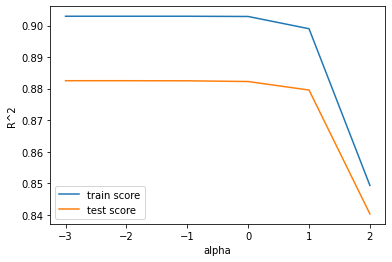

In [ ]:
# 하이퍼파라미터 조정
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, y_train2)
    train_score.append(ridge.score(train_scaled, y_train2))
    test_score.append(ridge.score(test_scaled, y_test2))

plt.plot(np.log10(alpha_list), train_score, label='train score')
plt.plot(np.log10(alpha_list), test_score, label='test score')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

In [ ]:
# 최고점에서의 값 확인(위에서 구한 초기값 적용과 비교: 대동소이)
ridge = Ridge(alpha=0.001)
ridge.fit(train_scaled, y_train2)
print(ridge.score(train_scaled, y_train2))
print(ridge.score(test_scaled, y_test2))

0.9029347422087665
0.8825137739188348


<br>


###**소 결**



5가지 모델을 통해 와인종류를 판별한 결과는 다음과 같다.

*   **Decision Tree**
    *   accuracy : 0.94 
    *   f1-score : (min)0.93,  (max)0.97
*   **Random Forest**
    *   accuracy : 1.00
    *   f1-score : (min)1.00,  (max)1.00
*   **Support Vector Machine(SVM)**
    *   accuracy : 0.81
    *   f1-score : (min)0.53,  (max)1.00
*   **SGD Classifier**
    *   accuracy : 0.58
    *   f1-score : (min)0.35,  (max)0.83
*   **Logistic Regression**
    *   accuracy : 1.00
    *   f1-score : (min)1.00,  (max)1.00

<br>

와인 판별의 경우 재현율(Recall)과 정밀도(Precision)를 고르게 반영하는 것이 적합하다. 따라서 정확도(accuracy)와 함께 F1 score를 추가적인 평가지표로 선택하여 검토한다.

정확도가 높은 모델을 중심으로 과적합 여부를 추가적으로 살펴본 결과, Logistic Regression이 과소적합 된것으로 나타났다. 규제적용(Ridge) 시 전체적인 점수가 하향되는 문제가 발생하여 적합한 모델이 아닌 것으로 판단하였다.

Random Forest의 경우, 모든 측면에서 점수가 높게(1.00) 측정되어 자체적으로는 성과의 적정성을 판단하기 어려웠다. 추가로 다른 앙상블 모델을 학습시켜 결과를 비교해 보았다. 히스토그램 기반 그레이디언트 부스팅의 학습 점수(1.00)와 테스트 점수(0.96)이 균형감 있게 나왔다. 따라서 기본 모델 중에서는 **랜덤 포레스트**를 선택하고, 대안모델로 **히스토그램 기반 그레이디언트 부스팅**도 적합하다고 결론 내린다.



<br><br><br><br><br><br>





---
##**3. load_breast_cancer: 유방암 여부 진단**


-

데이터 셋팅을 위해 scikit-learn에서 해당 테이터를 로딩한다. 데이터를 변수에 저장한 후 전반적인 내용을 파악했다.

총 569개의 데이터가 각각 30개의 값을 담고 있다.

target(label)은 악성(malignant)과 양성(benign)으로 구분된다.

DESCR 메서드로 확인한 결과, 해당 데이터는 유방에서 미세바늘흡인(FNA)을 통해 디지털화 된 이미지로부터 추출된 정보임을 알 수 있었다. 페이지 관계 상 이 부분은 별도로 출력하지 않는다.
 


In [ ]:
''' 데이터 셋팅 '''
# 필요한 모듈 import(위에서 이미 import한 모듈은 생략)
from sklearn.datasets import load_breast_cancer

# 데이터 준비
bc = load_breast_cancer()

# 데이터 이해
bc_data = bc.data
print(f'- data 형태: {bc_data.shape}') 
print(f'- data 정보: {bc.keys()}') 

bc.DESCR    # 데이터 상세정보 확인(출력생략)

bc_label = bc.target
print(f'- label: {bc.target_names}')
print(f'- feature: {bc.feature_names}') 

- data 형태: (569, 30)
- data 정보: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
- label: ['malignant' 'benign']
- feature: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# 자료형 변환; data frame
bc_df = pd.DataFrame(data=bc_data, columns=bc.feature_names)
bc_df["label"] = bc.target
bc_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0



<br>

학습을 위해 데이터를 구분한다.

학습에 사용될 Training Dataset과 모델의 성능을 평가할 Test Dataset으로 데이터를 나누기 위해 scikit-learn이 제공하는 train_test_split을 활용하였다.

Test Dataset의 비율은 전체 데이터의 20%로 설정(test_size=0.2)하고, 랜덤성을 특정(random_state=42)하였다.

아래와 같이 Training Dataset(X_train3) 455개, Test Dataset(X_test3) 114개로 구분되었다.

In [ ]:
# 데이터 구분 
X_train3, X_test3, y_train3, y_test3 = train_test_split(bc_data, bc_label, test_size=0.2, random_state=42)

print('- X_train3 개수: ', len(X_train3),', X_test3 개수: ', len(X_test3))


- X_train3 개수:  455 , X_test3 개수:  114


<br>

데이터 셋팅이 마쳤으니 이제 학습을 시켜보자.

<br>

###**[학습01.] Decision Tree**

In [ ]:
''' 학습 셋팅 '''
# 학습
decision_tree.fit(X_train3, y_train3)

# 예측
y_pred_21 = decision_tree.predict(X_test3)

# 정확도
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test3, y_pred_21)
print(f'► Decision Tree의 정확도는 {accuracy}') 

► Decision Tree의 정확도는 0.9473684210526315


<br>

###**[학습02.] Random Forest**

In [ ]:
''' 학습 셋팅 '''
# 학습
random_forest.fit(X_train3, y_train3)

# 예측
y_pred_22 = random_forest.predict(X_test3)

# 정확도
accuracy = accuracy_score(y_test3, y_pred_22)
print(f'► Random Forest의 정확도는 {accuracy}') 

► Random Forest의 정확도는 0.9649122807017544


<br>

###**[학습03.] Support Vector Machine(SVM)**

In [ ]:
''' 학습 셋팅 '''
# 학습
svm_model.fit(X_train3, y_train3)

# 예측
y_pred_23 = svm_model.predict(X_test3)

# 정확도
accuracy = accuracy_score(y_test3, y_pred_23)
print(f'► SVM의 정확도는 {accuracy}') 

► SVM의 정확도는 0.9473684210526315


<br>

###**[학습04.] SGD Classifier**

In [ ]:
''' 학습 셋팅 '''
# 학습 
sgd_model.fit(X_train3, y_train3)

# 예측
y_pred_24 = sgd_model.predict(X_test3)

# 정확도
accuracy = accuracy_score(y_test3, y_pred_24)
print(f'► SGD Classifier의 정확도는 {accuracy}') 

► SGD Classifier의 정확도는 0.956140350877193


<br>

###**[학습05.] Logistic Regression**

In [ ]:
''' 학습 셋팅 '''
# 학습
logistic_model.fit(X_train3, y_train3)

# 예측
y_pred_25 = logistic_model.predict(X_test3)

# 정확도
accuracy = accuracy_score(y_test3, y_pred_25)
print(f'► Logistic Regression의 정확도는 {accuracy}') 

► Logistic Regression의 정확도는 0.956140350877193


            
<br>

###**모델 평가**

정확도(accuracy)를 비교할 경우,
**Random Forest**의 정확도가 **96.5%**, **SGD Classifier, Logistic Regression**의 정확도가 **95.6%**로 높게 나타났다.

오차행렬(confusion_matrix)을 이용한 classification report은 아래 보는 것과 같다. 다섯 모델 모두 비교적 균일한 F1 score와 accuracy와의 차이도 크지 않음을 알 수 있다. 

다만, 유방암 진단이라는 목표는 실제 악성 환자임에도 이를 파악하지 못하여 적정 치료시기를 놓치는 경우가 가장 위험한 오류라고 볼 수 있다. 따라서 FN 낮아야 하므로 Recall(재현률)을 더 중요시 하는 것이 적정하다고 판단된다. 정확도가 높은 모델 가운데 **SGD Classifier**가 악성(malignant)을 의미하는 '0'의 Recall이 1.0로 재현률에 있어 매우 높은 성과를 보임을 알 수 있다.






In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Decision Tree report
confusion_matrix(y_test3, y_pred_21)
print(classification_report(y_test3, y_pred_21))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
# Random Forest report
confusion_matrix(y_test3, y_pred_22)
print(classification_report(y_test3, y_pred_22))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
# SVM report
confusion_matrix(y_test3, y_pred_23)
print(classification_report(y_test3, y_pred_23))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
# SGD Classifier report
confusion_matrix(y_test3, y_pred_24)
print(classification_report(y_test3, y_pred_24, zero_division=1))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       1.00      0.93      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# Logistic Regression report
confusion_matrix(y_test3, y_pred_25)
print(classification_report(y_test3, y_pred_25))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114




<br>

SGD Classifier의 훈련 세트와 테스트 세트를 그래프로 그려보자. 에포크를 300까지 늘려갈 때 점수변화를 알아볼 수 있도록 셋팅했다.

아래 그래프에서 볼 수 있듯이, 이 학습의 경우 에포크 값을 늘리는 것 자체가 큰 의미는 없다. 100번대에서 양호한 점수에 이르는 것으로 보고 이를 기준으로 다시 한 번 학습을 하겠다. 

이전 정확도에 비해 소폭 상승하여 

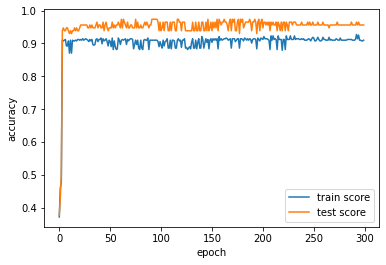

In [ ]:
# SGD Classifier Score Graph: 300번의 에포크 기록 
import numpy as np
sc = SGDClassifier(random_state=42)
train_score = []
test_score = []
classes = np.unique(y_train3)

for _ in range(0, 300):
    sc.partial_fit(X_train3, y_train3, classes=classes)
    train_score.append(sc.score(X_train3, y_train3))
    test_score.append(sc.score(X_test3, y_test3))

import matplotlib.pyplot as plt
plt.plot(train_score, label="train score")
plt.plot(test_score, label="test score")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
''' develop 01 '''
sgd_model = SGDClassifier(max_iter=100, tol=None, random_state=32)

# 학습 
sgd_model.fit(X_train3, y_train3)

# 예측
y_pred_24 = sgd_model.predict(X_test3)

# 정확도
accuracy = accuracy_score(y_test3, y_pred_24)
print(f'► SGD Classifier의 정확도는 {accuracy}') 

► SGD Classifier의 정확도는 0.9649122807017544


<br>

해당 모델의 정확도를 더 높일 수 있는 방안은 없을까? 모델이 예측한 확률 값을 직접적으로 반영하여 평가하는 Log loss를 적용해보자.

아래와 같이, 정확도가 97.4%로 증가했다. 





In [ ]:
''' develop 02 '''
sgd_model = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=32)

# 학습 
sgd_model.fit(X_train3, y_train3)

# 예측
y_pred_24 = sgd_model.predict(X_test3)

# 정확도
accuracy = accuracy_score(y_test3, y_pred_24)
print(f'► SGD Classifier의 정확도는 {accuracy}') 

► SGD Classifier의 정확도는 0.9736842105263158


<br>


###**소 결**



5가지 모델을 통해 유방암을 진단한 결과는 다음과 같다.

*   **Decision Tree**
    *   accuracy : 0.95
    *   f1-score : (min)0.93,  (max)0.96
    *   recall : (min)0.93,  (max)0.96
*   **Random Forest**
    *   accuracy : 0.96
    *   f1-score : (min)0.95,  (max)0.97
    *   recall : (min)0.93,  (max)0.99
*   **Support Vector Machine(SVM)**
    *   accuracy : 0.95
    *   f1-score : (min)0.92,  (max)0.96
    *   recall : (min)0.86,  (max)1.00
*   **SGD Classifier**
    *   accuracy : 0.96
    *   f1-score : (min)0.95,  (max)0.96
    *   recall : (min)0.93,  (max)1.00
*   **Logistic Regression**
    *   accuracy : 0.96
    *   f1-score : (min)0.94,  (max)0.97
    *   recall : (min)0.91,  (max)0.99

<br>

유방암 진단은 악성 환자를 놓치는 FN을 낮추는 것이 중요하므로 재현률(Recall)을 추가 평가지표로 선택했다. 따라서 정밀도와 F1-score 높은 모델들 가운데 Recall값이 가장 높게 나온 **SGD Classifier**가 적합한 모델이라고 판단된다.

기본적인 SGD Classifier 모델의 학습에 Epoch 값을 조정하여 성능을 개선할 수 있으며, Log loss을 적용하여 정확도를 증가시킬 수 있었다. 정확도 95.6%에서 Epoch 적용(100) 및 Log loss로 최종 97.4%까지 성능을 향상할 수 있었다.






<br><br><br><br><br><br>





---

# **III. 결 론**

<br>

(1) 손글씨 이미지 판별, (2) 와인 종류 판별, (3) 유방암 여부 진단, 총 3개의 문제를 해결하기 위해 해당 데이터를 import한 후 분석을 실시하고, 제시된 5가지의 Classification model을 기본으로 학습 및 테스트를 수행하였다. 또한 수행 결과의 평가를 위한 지표를 검토하여 가장 적정한 모델을 선택했다. 

이 과정에서 몇 가지 어려움이 있었다. 과적합이 발생한 경우가 있었고, 정확도(accuracy)가 유사한 모델 간 선택이 문제이기도 했다. 검증점수를 더 높일 수 있는 방법도 고민 되었다.

이를 해결하고자 추가적으로 과적합 여부 분석, 대안모델 검토, 규제적용 등을 실시했다. 또한 동일 모델에 Epoch를 조정한 결과를 비교하여 성능에 미치는 영향을 검토하였으며, Log loss를 통해 예측값의 정답확률을 높이기도 했다. 모든 시도가 성능개선에 유효한 역할을 한 것은 아니었지만 보다 나은 문제해결 방안을 찾기위한 노력이었다. 이때 데이터별 검증점수를 시각화하여 눈으로 확인하는 것이 대안을 모색하는 데 도움이 되었다.  

세 문제 모두 데이터 셋팅 및 학습은 유사한 구조로 진행됐지만 학습의 결과 및 적정 평가지표는 각각 달랐다. 결과값을 이해하고 평가를 올바르게 하기 위해서는 무엇보다 원 데이터의 이해가 중요하다는 생각이 든다. 데이터에 대한 이해가 선행되어야 해결하고자 하는 문제가 무엇인지 정확히 인식할 수 있고, 그래야 적절한 평가도 가능하다.

<br>

**[향후 과제]**

훈련 데이터의 검증점수가 만점(1.0)인 것 자체가 과대적합(overfitting)으로 해석되어야 하는지 판단하기 어려웠다. 특히 테스트 데이터의 점수는 적정한 차이를 두고 훈련 데이터 점수를 하회하는 경우, 성능이 좋다고 판단하여도 되는지에 관한 배경지식이 아직은 부족하다.

규제적용으로 조절되지 않은 과소적합(underfitting)을 해소할 방법을 알아내는 것도 향후 과제이다. 개념적으로는 훈련모델을 보다 고도화하는 것이 하나의 방법이 될 수 있다고 생각되는데 실제로 어떤 대안이 있는지 추가연구가 필요하다.




            
<br><br><br>



---

<br>

< 참고문헌 >

- ⌈혼자 공부하는 머신러닝 딥러닝⌋, 한빛미디어, 박해선 지음

<br><br>

---

